In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [4]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    d['R-squared'] = r_squared
    d['MAPE'] = mape
    
    return d

In [5]:
# Define the root directory where you want to search for CSV files
root_directory = r'C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators'

# Use the glob library to recursively find CSV files

csv_files = glob.glob(root_directory + '/*.csv', recursive= True)

for i in csv_files:
    print(i)

C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Monthly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Quarterly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Yearly.csv


In [6]:
path_quarterly = csv_files[1]
df_quarterly = pd.read_csv(path_quarterly)

df_quarterly.drop(columns= ['Unnamed: 4'], inplace= True)
df_quarterly['PERIOD'] = pd.to_datetime(df_quarterly['PERIOD'])
df_quarterly.set_index(['PERIOD'], inplace= True)

df_quarterly.sort_index(ascending= True)

df_quarterly.head()

,ACTUAL_VALUE,INDICATOR_CODE,INDICATOR_NAME
PERIOD,,,
2000-03-31,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-06-30,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-09-30,23.3,SAFZAXX01Qa001,Unemployment Rate
2000-12-31,23.3,SAFZAXX01Qa001,Unemployment Rate
2001-03-31,24.6,SAFZAXX01Qa001,Unemployment Rate


In [7]:
df_quarterly = df_quarterly.pivot_table(index= df_quarterly.index, columns='INDICATOR_NAME', values='ACTUAL_VALUE')

In [8]:
# Original indicators present in quarterly df

len(df_quarterly.columns)

308

In [9]:
# Checking if Real GDP is present as indicator 

import re

words = df_quarterly.columns

# Define the regular expression pattern
pattern = r'\bGDP\b'

def find_similar_words(word_list, pattern):
    matches = []
    for word in word_list:
        if re.search(pattern, word, flags=re.IGNORECASE):
            matches.append(word)
    return matches


similar_words = find_similar_words(words, pattern)

if similar_words:
    print("Words similar to 'GDP' found:")
    for word in similar_words:
        print(word)


Words similar to 'GDP' found:
Annualised GDP s.a. - Agriculture, Forestry and Fishing
Annualised GDP s.a. - Construction
Annualised GDP s.a. - Electricity, Gas and Water
Annualised GDP s.a. - Finance, Real Estate and Business Services
Annualised GDP s.a. - General Government Services
Annualised GDP s.a. - Manufacturing
Annualised GDP s.a. - Mining and Quarrying
Annualised GDP s.a. - Personal Services
Annualised GDP s.a. - Trade, Catering and Accommodation
Annualised GDP s.a. - Transport, Storage and Communication
Current Account to GDP
Nominal GDP - Agriculture, Forestry and Fishing
Nominal GDP - Construction
Nominal GDP - Electricity, Gas and Water
Nominal GDP - Finance, Real Estate and Business Services
Nominal GDP - General Government Services
Nominal GDP - Manufacturing
Nominal GDP - Mining and Quarrying
Nominal GDP - Personal Sevices
Nominal GDP - Taxes less Subsidies on Products
Nominal GDP - Transport, Storage and Communication
Nominal GDP - Wholesale and Retail Trade, Hotels an

In [10]:
# Checking the % of null values in 'Nominal GDP' column

df_quarterly['Nominal GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

54.90196078431373

In [11]:
df_quarterly['Real GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

52.54901960784314

In [12]:
# Setting threshold at 55 % NaN (45% values)

cols = [col for col in df_quarterly.columns if (df_quarterly[col].isnull().sum() / len(df_quarterly) * 100) < 55]
len(cols)

90

In [13]:
df_quarterly = df_quarterly[cols]   

# Number of records after dropping the NaN values

df_quarterly.dropna(inplace= True)
print(len(df_quarterly))

106


In [14]:
df_quarterly.head(3)

INDICATOR_NAME,"Annualised GDP s.a. - Agriculture, Forestry and Fishing",Annualised GDP s.a. - Construction,"Annualised GDP s.a. - Electricity, Gas and Water","Annualised GDP s.a. - Finance, Real Estate and Business Services",Annualised GDP s.a. - General Government Services,Annualised GDP s.a. - Manufacturing,Annualised GDP s.a. - Mining and Quarrying,Annualised GDP s.a. - Personal Services,"Annualised GDP s.a. - Trade, Catering and Accommodation","Annualised GDP s.a. - Transport, Storage and Communication",...,Real GDP - Mining and Quarrying,Real GDP - Personal Sevices,"Real GDP - Transport, Storage and Communication","Real GDP - Wholesale and Retail Trade, Hotels and Restaurants",Real GDP Value Added at Basic Prices,Real GDP at Market Prices,Remuneration Per Worker Change - Private Sector (QoQ),Remuneration Per Worker Change - Public Sector (QoQ),Remuneration Per Worker Change - Total (QoQ),Total Assets of Short-Term Insurers
PERIOD,,,,,,,,,,,,,,,,,,,,,
1994-03-31,64026.620653,57342.366141,87523.336250,354152.560074,227628.430585,337649.493638,231749.140782,342888.272293,264449.365227,126106.484297,...,57172.719377,84734.885720,31295.810995,62265.132984,510613.532207,571211.440642,9.6,10.5,9.7,23161.0
1994-06-30,64285.022588,57751.530606,89086.502788,359991.380964,228597.901869,339889.100966,231938.641217,349376.731168,265495.709238,127244.410734,...,57598.249635,87266.832172,30704.915319,62755.609930,534134.220462,596439.624071,10.8,28.0,15.3,24107.0
1994-09-30,65254.419647,58426.977602,89584.140443,364604.665397,229647.447559,345744.630827,231706.983098,355656.745711,267528.277481,129533.640280,...,58578.505551,89670.909748,33055.844116,66206.223103,543091.447336,606374.562406,12.8,22.5,15.4,24472.0


In [15]:
df_quarterly.index

DatetimeIndex(['1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30',
               ...
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
               '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30'],
              dtype='datetime64[ns]', name='PERIOD', length=106, freq=None)

## Pre-processing

In [16]:
X = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
y = df_quarterly['Real GDP at Market Prices']

X_train, y_train = X[:-16], y[:-16]
X_test, y_test = X[-16:], y[-16:]

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
X_train_scaled_kmean = X_train_scaled
X_test_scaled_kmean = X_test_scaled

In [19]:
X_test.head()

INDICATOR_NAME,"Annualised GDP s.a. - Agriculture, Forestry and Fishing",Annualised GDP s.a. - Construction,"Annualised GDP s.a. - Electricity, Gas and Water","Annualised GDP s.a. - Finance, Real Estate and Business Services",Annualised GDP s.a. - General Government Services,Annualised GDP s.a. - Manufacturing,Annualised GDP s.a. - Mining and Quarrying,Annualised GDP s.a. - Personal Services,"Annualised GDP s.a. - Trade, Catering and Accommodation","Annualised GDP s.a. - Transport, Storage and Communication",...,Real GDP - Manufacturing,Real GDP - Mining and Quarrying,Real GDP - Personal Sevices,"Real GDP - Transport, Storage and Communication","Real GDP - Wholesale and Retail Trade, Hotels and Restaurants",Real GDP Value Added at Basic Prices,Remuneration Per Worker Change - Private Sector (QoQ),Remuneration Per Worker Change - Public Sector (QoQ),Remuneration Per Worker Change - Total (QoQ),Total Assets of Short-Term Insurers
PERIOD,,,,,,,,,,,,,,,,,,,,,
2016-09-30,83093.954710,155953.808621,110079.097166,939734.377951,351895.387996,558355.508135,223884.078467,660878.473743,564168.822393,366768.170798,...,143569.357417,57913.617599,166393.028617,92967.393029,136755.225816,1.008203e+06,5.7,4.9,5.6,157993.0
2016-12-31,102913.594477,153944.994211,108494.673442,942443.495507,352537.050140,545753.897613,217224.551090,662242.283098,562684.317729,369334.731986,...,142947.713881,55987.882967,161844.519102,94451.041163,160197.118986,1.022684e+06,4.6,8.4,5.6,155652.0
2017-03-31,107551.516666,150269.334042,109714.778084,950570.304571,354485.249542,549665.921255,224972.432499,665796.514758,556850.938881,366149.329967,...,129883.723879,51483.985014,167204.455179,88868.189782,131472.905584,9.845882e+05,5.3,10.5,6.5,159265.0
2017-06-30,122298.173607,147388.015529,110598.531439,959540.749127,354702.579650,553675.127558,220032.365058,667790.223950,555516.945004,367153.060776,...,134802.914889,55926.473487,168779.580067,91458.844760,131125.662338,1.016456e+06,5.1,9.8,6.2,164827.0
2017-12-31,104538.466262,144649.494567,110840.555407,971565.631580,358402.419258,560227.789663,227209.540587,669202.593577,560060.468564,375635.076634,...,146845.259690,58552.872703,163336.058530,95875.830871,159720.595087,1.038186e+06,5.3,9.5,6.4,170233.0


### Using 'Feature importance' method of Random forest (train + scaled data)

In [20]:
# Using 'Feature importance' of random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [21]:
feature_importances = rf_model.feature_importances_
feature_importances

array([3.64031377e-05, 9.41944067e-03, 3.39840245e-04, 1.95388664e-02,
       5.86484829e-02, 2.61173436e-02, 2.31848405e-04, 2.02815527e-03,
       9.21589489e-03, 4.50446669e-03, 1.60816834e-02, 3.77253724e-04,
       1.98629528e-03, 2.02338261e-04, 5.29202371e-04, 6.82548373e-04,
       2.58317151e-03, 1.11331584e-03, 2.65561255e-02, 1.04114655e-02,
       4.02988171e-04, 8.64297396e-03, 3.56917274e-04, 2.28324214e-04,
       3.50329283e-04, 2.20026079e-04, 3.65981386e-04, 5.44734552e-05,
       6.07587510e-02, 8.72803441e-04, 8.91145140e-04, 5.53120046e-04,
       1.17191480e-03, 6.30119892e-03, 1.15037081e-02, 6.26427631e-03,
       8.33991202e-03, 1.62320309e-02, 9.34991454e-03, 2.11810268e-02,
       1.26541519e-02, 5.70016489e-03, 3.02582356e-02, 2.31113780e-03,
       4.01843713e-03, 2.21884990e-02, 5.69343904e-05, 4.04065348e-05,
       6.80359981e-02, 1.99684122e-04, 4.54463353e-04, 2.53868559e-02,
       7.08564899e-04, 2.54254719e-02, 1.04145613e-03, 1.95440368e-02,
      

In [22]:
len(X_train_scaled[0, :]), len(feature_importances)

(89, 89)

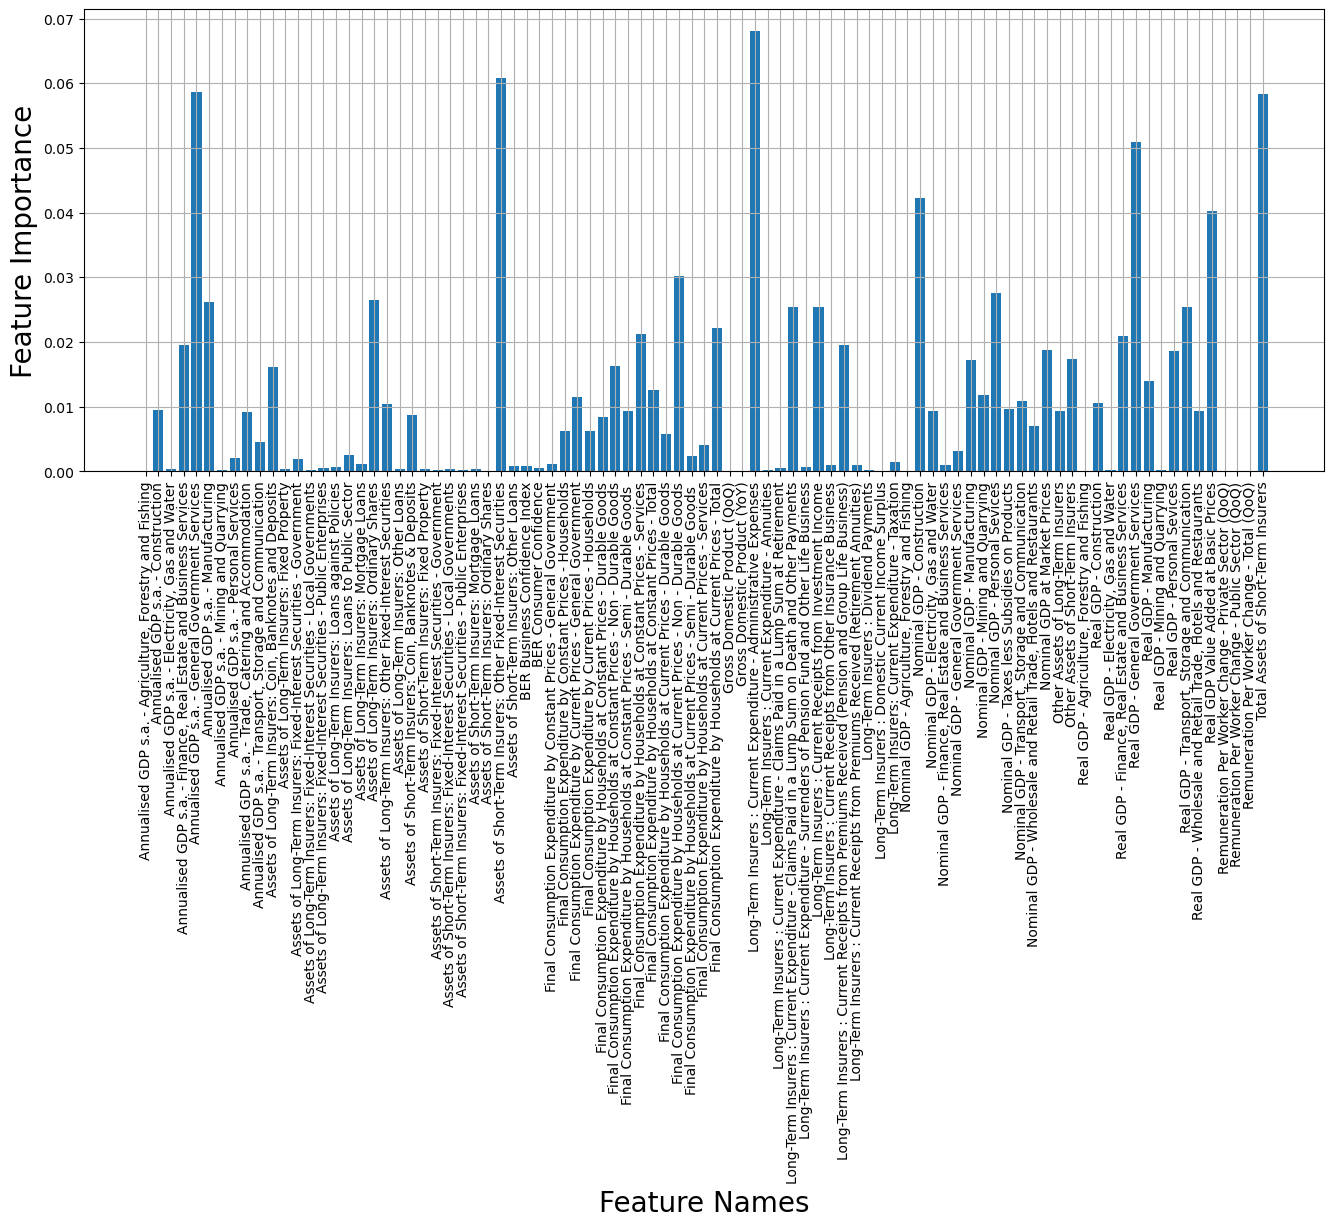

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature importances
plt.figure(figsize=(16,6))
plt.xticks(rotation= 'vertical')
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature Names', size= 20) 
plt.ylabel('Feature Importance', size= 20)
plt.grid()
plt.show()


In [24]:
# Create a DataFrame to associate feature names with importances

imp_feature_df = pd.DataFrame({'Features': X_train.columns, 'importance': feature_importances})
imp_feature_df

,Features,importance
0,"Annualised GDP s.a. - Agriculture, Forestry an...",0.000036
1,Annualised GDP s.a. - Construction,0.009419
2,"Annualised GDP s.a. - Electricity, Gas and Water",0.000340
3,"Annualised GDP s.a. - Finance, Real Estate and...",0.019539
4,Annualised GDP s.a. - General Government Services,0.058648
...,...,...
84,Real GDP Value Added at Basic Prices,0.040183
85,Remuneration Per Worker Change - Private Secto...,0.000044
86,Remuneration Per Worker Change - Public Sector...,0.000025
87,Remuneration Per Worker Change - Total (QoQ),0.000071


#### Important features using 'feature importance'

In [25]:
# Important features using RF having importance > 0.04

rf_imp_features = imp_feature_df[imp_feature_df['importance'] >= 0.04]['Features']
rf_imp_features

4     Annualised GDP s.a. - General Government Services
28    Assets of Short-Term Insurers: Other Fixed-Int...
48    Long-Term Insurers : Current Expenditure - Adm...
61                           Nominal GDP - Construction
78               Real GDP - General Government Services
84                 Real GDP Value Added at Basic Prices
88                  Total Assets of Short-Term Insurers
Name: Features, dtype: object

### 2. Pearson Correlation

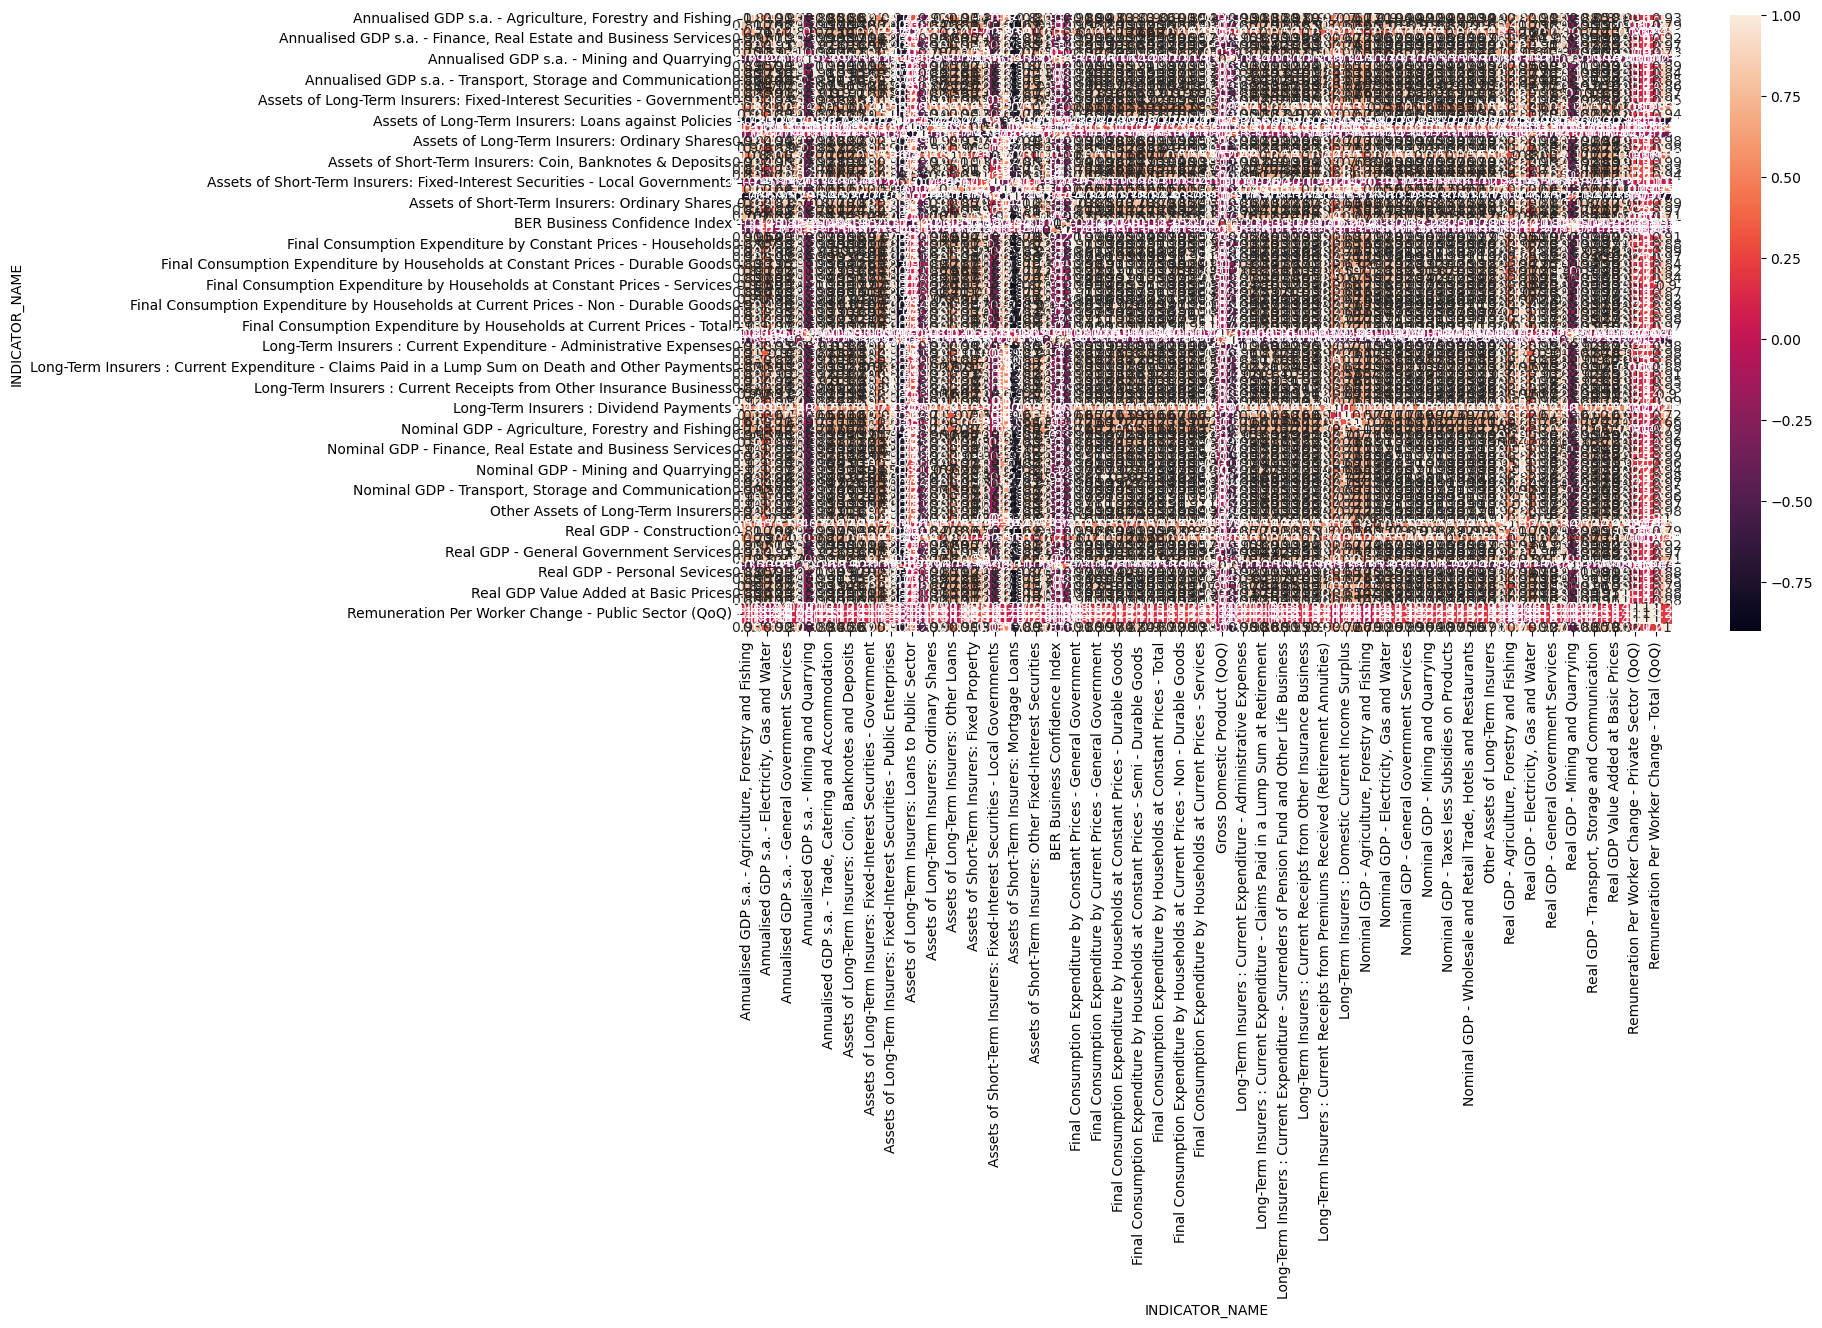

In [26]:
import seaborn as sns

plt.figure(figsize= (15,8))
sns.heatmap(df_quarterly.corr(), annot= True)
plt.show()

In [27]:
correlations = df_quarterly.corr()

threshold = 0.99

# Extract features with correlation higher than the threshold with the target
target_correlations = correlations['Real GDP at Market Prices']
highly_correlated_features = target_correlations[abs(target_correlations) > threshold].index.tolist()

# Remove the target feature from the list (if it's included)
if 'Real GDP at Market Prices' in highly_correlated_features:
    highly_correlated_features.remove('Real GDP at Market Prices')

# Extract the DataFrame with highly correlated features
selected_features_df = df_quarterly[highly_correlated_features]

In [28]:
# Name of features with correlation higher than 0.99 with Target 

selected_features_df.columns, len(selected_features_df.columns)

(Index(['Annualised GDP s.a. - Personal Services',
        'Annualised GDP s.a. - Trade, Catering and Accommodation',
        'Final Consumption Expenditure by Constant Prices - Households',
        'Final Consumption Expenditure by Households at Constant Prices - Services',
        'Final Consumption Expenditure by Households at Constant Prices - Total',
        'Real GDP - Transport, Storage and Communication',
        'Real GDP Value Added at Basic Prices'],
       dtype='object', name='INDICATOR_NAME'),
 7)

### Using 'Recursive feature elimination' (RFE)

In [29]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select= 7)

rfe.fit(X_train_scaled, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=7)

In [30]:
feature_ranking = rfe.ranking_
feature_ranking

array([68, 22, 59, 56,  1, 33, 58, 27,  9, 17, 26, 67, 31, 50, 71, 55, 45,
       57,  7,  4, 51, 32, 62, 66, 81, 72, 49, 79,  2, 78, 44, 61, 48, 30,
       14,  8, 70, 21, 41, 13, 23, 25, 24, 37, 34, 15, 80, 82,  1, 54, 47,
       36, 65, 60, 40, 43, 53, 75, 74, 63, 76, 35, 39, 42, 20, 18, 19, 28,
       29,  1, 11,  5, 16, 38, 83,  6, 64,  3, 12, 10, 52,  1,  1, 46,  1,
       73, 77, 69,  1])

In [31]:
# Getting feature names using RFE (masking)

feature_names = X_train.columns

selected_features_mask = rfe.support_  # Boolean mask of selected features
rfe_imp_features = [feature_names[i] for i, is_selected in enumerate(selected_features_mask) if is_selected]

rfe_imp_features

['Annualised GDP s.a. - General Government Services',
 'Long-Term Insurers : Current Expenditure - Administrative Expenses',
 'Nominal GDP - Transport, Storage and Communication',
 'Real GDP - Personal Sevices',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices',
 'Total Assets of Short-Term Insurers']

In [32]:
# Features selected using 'feature importance'

rf_imp_features

4     Annualised GDP s.a. - General Government Services
28    Assets of Short-Term Insurers: Other Fixed-Int...
48    Long-Term Insurers : Current Expenditure - Adm...
61                           Nominal GDP - Construction
78               Real GDP - General Government Services
84                 Real GDP Value Added at Basic Prices
88                  Total Assets of Short-Term Insurers
Name: Features, dtype: object

In [33]:
# Features selected using Pearson correlation

selected_features_df.columns

Index(['Annualised GDP s.a. - Personal Services',
       'Annualised GDP s.a. - Trade, Catering and Accommodation',
       'Final Consumption Expenditure by Constant Prices - Households',
       'Final Consumption Expenditure by Households at Constant Prices - Services',
       'Final Consumption Expenditure by Households at Constant Prices - Total',
       'Real GDP - Transport, Storage and Communication',
       'Real GDP Value Added at Basic Prices'],
      dtype='object', name='INDICATOR_NAME')

In [34]:
d = {}
for i in zip(X_train.columns, feature_ranking):
    d[i[0]] = i[1]

In [35]:
rfe_rank_df = pd.DataFrame({'Features' : d.keys(), 'RFE_rank': d.values()})
rfe_rank_df

,Features,RFE_rank
0,"Annualised GDP s.a. - Agriculture, Forestry an...",68
1,Annualised GDP s.a. - Construction,22
2,"Annualised GDP s.a. - Electricity, Gas and Water",59
3,"Annualised GDP s.a. - Finance, Real Estate and...",56
4,Annualised GDP s.a. - General Government Services,1
...,...,...
84,Real GDP Value Added at Basic Prices,1
85,Remuneration Per Worker Change - Private Secto...,73
86,Remuneration Per Worker Change - Public Sector...,77
87,Remuneration Per Worker Change - Total (QoQ),69


### Comparison of features selected from different techniques VS All features

### 1. Base model

In [36]:
# Base Model

base_model = RandomForestRegressor(random_state= 42)
base_model.fit(X_train_scaled, y_train)

y_pred_base = base_model.predict(X_test_scaled)
y_pred_base, y_test

(array([1108926.54927166, 1116564.27649325, 1097929.20535258,
        1107537.68897647, 1113807.82821898, 1106771.90323979,
        1110109.38273793, 1110405.89650765, 1115824.14370463,
        1108730.23493397, 1109438.03302091, 1109795.20735839,
        1113033.27555123, 1108535.90590691, 1024155.90977873,
        1090698.39493478]),
 PERIOD
 2016-09-30    1.117489e+06
 2016-12-31    1.135304e+06
 2017-03-31    1.091113e+06
 2017-06-30    1.125688e+06
 2017-12-31    1.152378e+06
 2018-03-31    1.105005e+06
 2018-06-30    1.134992e+06
 2018-09-30    1.156398e+06
 2018-12-31    1.173837e+06
 2019-03-31    1.111361e+06
 2019-06-30    1.146265e+06
 2019-09-30    1.158118e+06
 2019-12-31    1.168357e+06
 2020-03-31    1.118596e+06
 2020-06-30    9.557532e+05
 2020-09-30    1.091730e+06
 Name: Real GDP at Market Prices, dtype: float64)

In [37]:
metrics_base = metrics(y_test, y_pred_base)
metrics_base

{'MSE': 1245706210.3790836,
 'RMSE': 35294.56346775072,
 'R-squared': 0.49065570696855076,
 'MAPE': 2.486281275871026}

### 2. Using 'feature importance' features

In [38]:
X_fi = X[rf_imp_features]

X_train_fi, X_test_fi = X_fi[:-16], X_fi[-16:]

sc_fi = StandardScaler()
X_train_fi_scaled = sc_fi.fit_transform(X_train_fi)
X_test_fi_scaled = sc_fi.transform(X_test_fi)

In [39]:
model_fi = RandomForestRegressor(random_state= 42)
model_fi.fit(X_train_fi_scaled, y_train)

y_pred_fi = model_fi.predict(X_test_fi_scaled)
y_pred_fi

array([1119901.23416951, 1121975.72575173, 1093469.11047914,
       1122176.17359017, 1121975.72575173, 1110236.43314171,
       1122176.17359017, 1121977.32490204, 1121977.32490204,
       1113809.52881206, 1122176.17359017, 1121977.32490204,
       1122054.02819808, 1121456.27088591, 1022682.88974628,
       1098565.7474268 ])

In [40]:
metrics_fi = metrics(y_test, y_pred_fi)
metrics_fi

{'MSE': 860149850.2935495,
 'RMSE': 29328.311412243795,
 'R-squared': 0.6483019722077552,
 'MAPE': 1.927707287610625}

### 3. Using 'Recursive Feature Elimination' (RFE) features

In [41]:
rfe_imp_features

['Annualised GDP s.a. - General Government Services',
 'Long-Term Insurers : Current Expenditure - Administrative Expenses',
 'Nominal GDP - Transport, Storage and Communication',
 'Real GDP - Personal Sevices',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices',
 'Total Assets of Short-Term Insurers']

In [42]:
X_rfe = X[rfe_imp_features]

X_train_rfe, X_test_rfe = X_rfe[:-16], X_rfe[-16:]

sc_rfe = StandardScaler()
X_train_rfe_scaled = sc_rfe.fit_transform(X_train_rfe)
X_test_rfe_scaled = sc_rfe.transform(X_test_rfe)

In [43]:
model_rfe = RandomForestRegressor(random_state= 42)
model_rfe.fit(X_train_rfe_scaled, y_train)

y_pred_rfe = model_rfe.predict(X_test_rfe_scaled)
y_pred_rfe, y_test

(array([1121864.00130416, 1123078.51808923, 1096441.27684111,
        1122684.0648227 , 1122506.0539632 , 1114169.66078506,
        1120494.93117784, 1122684.0648227 , 1122543.86788126,
        1116845.42799748, 1122684.0648227 , 1122684.0648227 ,
        1122684.0648227 , 1115513.00821775, 1002729.07929097,
        1086790.33663193]),
 PERIOD
 2016-09-30    1.117489e+06
 2016-12-31    1.135304e+06
 2017-03-31    1.091113e+06
 2017-06-30    1.125688e+06
 2017-12-31    1.152378e+06
 2018-03-31    1.105005e+06
 2018-06-30    1.134992e+06
 2018-09-30    1.156398e+06
 2018-12-31    1.173837e+06
 2019-03-31    1.111361e+06
 2019-06-30    1.146265e+06
 2019-09-30    1.158118e+06
 2019-12-31    1.168357e+06
 2020-03-31    1.118596e+06
 2020-06-30    9.557532e+05
 2020-09-30    1.091730e+06
 Name: Real GDP at Market Prices, dtype: float64)

In [44]:
metrics_rfe = metrics(y_test, y_pred_rfe)
metrics_rfe

{'MSE': 708033230.0306998,
 'RMSE': 26608.89381448804,
 'R-squared': 0.7104994082970693,
 'MAPE': 1.8356350613977026}

## Results

In [45]:
metrics_base

{'MSE': 1245706210.3790836,
 'RMSE': 35294.56346775072,
 'R-squared': 0.49065570696855076,
 'MAPE': 2.486281275871026}

In [46]:
metrics_fi

{'MSE': 860149850.2935495,
 'RMSE': 29328.311412243795,
 'R-squared': 0.6483019722077552,
 'MAPE': 1.927707287610625}

In [47]:
metrics_rfe

{'MSE': 708033230.0306998,
 'RMSE': 26608.89381448804,
 'R-squared': 0.7104994082970693,
 'MAPE': 1.8356350613977026}

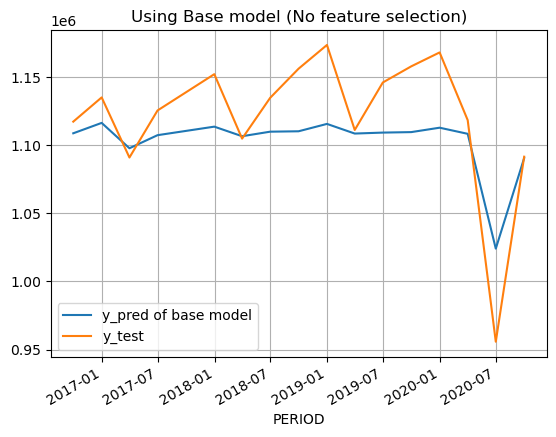

In [48]:
y_pred_base = pd.Series(y_pred_base, index= y_test.index)

y_pred_base.plot(label= 'y_pred of base model')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using Base model (No feature selection)')
plt.show()

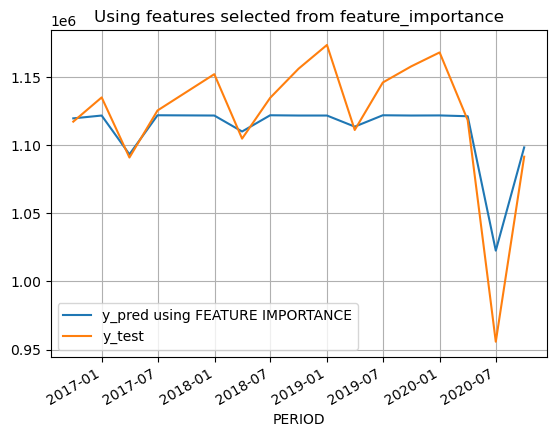

In [49]:
y_pred_fi = pd.Series(y_pred_fi, index= y_test.index)

y_pred_fi.plot(label= 'y_pred using FEATURE IMPORTANCE')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using features selected from feature_importance')
plt.show()

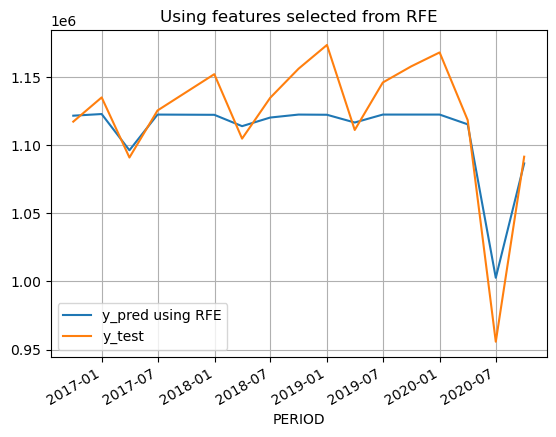

In [50]:
y_pred_rfe = pd.Series(y_pred_rfe, index= y_test.index)

y_pred_rfe.plot(label= 'y_pred using RFE')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using features selected from RFE')
plt.show()

In [51]:
y_train

PERIOD
1994-03-31    5.712114e+05
1994-06-30    5.964396e+05
1994-09-30    6.063746e+05
1994-12-31    6.152152e+05
1995-03-31    5.940184e+05
                  ...     
2015-06-30    1.099417e+06
2015-09-30    1.107572e+06
2015-12-31    1.129962e+06
2016-03-31    1.083941e+06
2016-06-30    1.113437e+06
Name: Real GDP at Market Prices, Length: 90, dtype: float64

In [52]:
y_test

PERIOD
2016-09-30    1.117489e+06
2016-12-31    1.135304e+06
2017-03-31    1.091113e+06
2017-06-30    1.125688e+06
2017-12-31    1.152378e+06
2018-03-31    1.105005e+06
2018-06-30    1.134992e+06
2018-09-30    1.156398e+06
2018-12-31    1.173837e+06
2019-03-31    1.111361e+06
2019-06-30    1.146265e+06
2019-09-30    1.158118e+06
2019-12-31    1.168357e+06
2020-03-31    1.118596e+06
2020-06-30    9.557532e+05
2020-09-30    1.091730e+06
Name: Real GDP at Market Prices, dtype: float64

In [53]:
X_test_scaled[0].shape, len(X_test_scaled[0,:])

((89,), 89)

In [54]:
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)
model_linear = sm.OLS(y_train, X_train_scaled)
results = model_linear.fit()

In [55]:
coeffecients = results.params

for i in zip(coeffecients.index, coeffecients):
    print(i)

('const', 851531.5729612468)
('x1', -925.1352250362688)
('x2', -22950.874973812606)
('x3', 5380.273727940046)
('x4', 13344.921497234143)
('x5', 9440.274394386448)
('x6', -4511.8605174091645)
('x7', 1768.1417378991173)
('x8', -4540.0412682454335)
('x9', 5793.6362022655085)
('x10', -1968.5960447872058)
('x11', -153.66644698218442)
('x12', -71.98101053066785)
('x13', -310.5056607077131)
('x14', 1067.7763305049448)
('x15', -521.573434154503)
('x16', -1281.3179927586752)
('x17', -1139.7653155035805)
('x18', -163.857695877261)
('x19', 8487.494289102964)
('x20', -7734.4831769033335)
('x21', -2100.8919665449066)
('x22', 16687.105030660518)
('x23', -133.75196477374993)
('x24', 3295.1351775954245)
('x25', 1105.2438419631217)
('x26', 1788.1161945589083)
('x27', 929.0736432360573)
('x28', 950.0850750713726)
('x29', 4920.193923293147)
('x30', 2111.882463151356)
('x31', -1118.7424256484373)
('x32', -198.02207914886822)
('x33', 8416.187511403929)
('x34', 10721.141786289401)
('x35', -56503.78209263575

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Real GDP at Market Prices   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 1.136e+05
Date:                       Mon, 02 Oct 2023   Prob (F-statistic):           8.80e-06
Time:                               11:07:21   Log-Likelihood:                -518.85
No. Observations:                         90   AIC:                             1214.
Df Residuals:                              2   BIC:                             1434.
Df Model:                                 87                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.515e+05     54.569   1.56e+04      0.000    8.51e+05    8.52e+05
x1          -925.1352   1267.476     -0.730      0.541   -6378.644    4528.374
x2         -2.295e+04   2.28e+04     -1.006      0.420   -1.21e+05    7.52e+04
x3          5380.2737   4890.339      1.100      0.386   -1.57e+04    2.64e+04
x4          1.334e+04   2.46e+04      0.543      0.641   -9.23e+04    1.19e+05
x5          9440.2744   3.33e+04      0.283      0.804   -1.34e+05    1.53e+05
x6         -4511.8605   8467.160     -0.533      0.647   -4.09e+04    3.19e+04
x7          1768.1417   1259.613      1.404      0.296   -3651.537    7187.820
x8         -4540.0413   1.11e+04     -0.407      0.723   -5.25e+04    4.34e+04
x9          5793.6362   1.06e+04      0.546      0.640   -3.98e+04    5.14e+04
x10        -1968.5960   1.85e+04     -0.106      0.925   -8.15e+04    7.76e+04
x11         -153.6664   4600.628     -0.033      0.976   -1.99e+04    1.96e+04
x12          -71.9810   2057.970     -0.035      0.975   -8926.710    8782.748
x13         -310.5057   3197.327     -0.097      0.931   -1.41e+04    1.34e+04
x14         1067.7763    862.601      1.238      0.341   -2643.696    4779.249
x15         -521.5734   3193.564     -0.163      0.885   -1.43e+04    1.32e+04
x16        -1281.3180   1329.073     -0.964      0.437   -6999.856    4437.220
x17        -1139.7653   1196.150     -0.953      0.441   -6286.383    4006.853
x18         -163.8577   1701.152     -0.096      0.932   -7483.323    7155.608
x19         8487.4943   1.58e+04      0.538      0.644   -5.94e+04    7.63e+04
x20        -7734.4832   1.14e+04     -0.677      0.568   -5.69e+04    4.14e+04
x21        -2100.8920   9042.011     -0.232      0.838    -4.1e+04    3.68e+04
x22         1.669e+04   1.93e+04      0.865      0.478   -6.63e+04    9.97e+04
x23         -133.7520   3294.498     -0.041      0.971   -1.43e+04     1.4e+04
x24         3295.1352   2820.647      1.168      0.363   -8841.129    1.54e+04
x25         1105.2438    738.692      1.496      0.273   -2073.091    4283.579
x26         1788.1162   1036.851      1.725      0.227   -2673.092    6249.325
x27          929.0736   1290.880      0.720      0.546   -4625.133    6483.281
x28          950.0851   4182.859      0.227      0.841    -1.7e+04    1.89e+04
x29         4920.1939   2791.396      1.763      0.220   -7090.214    1.69e+04
x30         2111.8825   1584.826      1.333      0.314   -4707.073    8930.838
x31        -1118.7424   1065.365     -1.050      0.404   -5702.640    3465.155
x32         -198.0221    360.129     -0.550      0.638   -1747.531    1351.487
x33         8416.1875   6480.185      1.299      0.324   -1.95e+04    3.63e+04
x34         1.072e+04   2.17e+04      0.494      0.670   -8.26e+04    1.04e+05
x35 

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
lr.coef_

array([ 6.09692265e+15, -1.88839591e+03, -3.21766424e+04,  7.22437578e+03,
        1.58212114e+04,  2.08500251e+04, -4.22383241e+03,  1.21396748e+03,
       -4.40638681e+03,  1.69651230e+03, -1.07359885e+02,  3.70221820e+02,
       -1.73373562e+03, -4.26337177e+01,  1.06917602e+03, -2.24133861e+02,
       -1.76911900e+03, -8.75575991e+02, -6.99360889e+01,  1.19597728e+04,
       -6.99633643e+03, -1.66265201e+03,  2.06560552e+04,  3.34677613e+02,
        2.85525582e+03,  1.09815269e+03,  1.72175001e+03,  1.36545228e+03,
        1.02655763e+03,  5.92288509e+03,  1.12895573e+03, -1.58802893e+03,
       -3.46999315e+02,  8.82877070e+03,  2.00721494e+04, -6.35218601e+04,
        4.91368721e+07, -7.67402428e+03, -3.56285500e+03,  1.31307520e+03,
        1.23119798e+04,  2.00721469e+04, -9.88536820e+06, -3.03081617e+07,
       -8.37103127e+06, -5.01543931e+07,  4.91368721e+07,  7.60056567e+02,
        7.71381329e+02,  1.16714434e+05,  1.18284075e+05,  1.41996138e+05,
        3.39630758e+05,  

In [59]:
lr.intercept_

-6096922653618028.0

## Dynamic Factor model (DFM)

In [60]:
import statsmodels.tsa.api as sm

In [61]:
df_dfm = df_quarterly

In [62]:
# Instantiate our model
model_dfm = sm.DynamicFactorMQ(endog= df_dfm, factors= 2, factor_orders=1, idiosyncratic_ar1=True)

# Fit the DFM
results_dfm = model_dfm.fit(maxiter=100, disp=True)

c:\Users\himanshu.verma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\himanshu.verma\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM start iterations, llf=2561.1
EM iteration 2, llf=2896.1, convergence criterion=0.12278
EM iteration 3, llf=2962.8, convergence criterion=0.022747
EM iteration 4, llf=2987.8, convergence criterion=0.0084111
EM iteration 5, llf=2996.9, convergence criterion=0.0030249
EM iteration 6, llf=2999.8, convergence criterion=0.00097761
EM iteration 7, llf=3000.7, convergence criterion=0.00030553
EM iteration 8, llf=3001, convergence criterion=0.00010123
EM iteration 9, llf=3001.1, convergence criterion=3.8678e-05
EM iteration 10, llf=3001.2, convergence criterion=1.8141e-05
EM iteration 11, llf=3001.2, convergence criterion=1.0524e-05
EM iteration 12, llf=3001.2, convergence criterion=7.1836e-06
EM iteration 13, llf=3001.3, convergence criterion=5.4176e-06
EM iteration 14, llf=3001.3, convergence criterion=4.32e-06
EM iteration 15, llf=3001.3, convergence criterion=3.5567e-06
EM iteration 16, llf=3001.3, convergence criterion=2.9884e-06
EM iteration 17, llf=3001.3, convergence criterion=2.5476

In [63]:
results_dfm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        Dynamic Factor Results                                        
======================================================================================================
Dep. Variable:     "Annualised GDP s.a. - Ag...", and 89 more   No. Observations:                  106
Model:                                   Dynamic Factor Model   Log Likelihood                3001.330
                                      + 2 factors in 2 blocks   AIC                          -5274.660
                                        + AR(1) idiosyncratic   BIC                          -4305.168
Date:                                        Mon, 02 Oct 2023   HQIC                         -4881.720
Time:                                                11:07:23   EM Iterations                       25
Sample:                                                     0                                         
                                                        - 106                                         
Covariance Type:                                 Not computed                                         
                                Observation equation:                                
=====================================================================================
           Factor loadings:          0          1    idiosyncratic: AR(1)        var.
-------------------------------------------------------------------------------------
Annualised GDP s.a. - Ag...       0.11       0.02                    0.58        0.08
Annualised GDP s.a. - Co...       0.11      -0.05                    0.98        0.00
Annualised GDP s.a. - El...       0.07      -0.12                    0.90        0.02
Annualised GDP s.a. - Fi...       0.12      -0.02                    0.97        0.00
Annualised GDP s.a. - Ge...       0.12       0.02                    0.96        0.00
Annualised GDP s.a. - Ma...       0.11      -0.07                    0.39        0.03
Annualised GDP s.a. - Mi...      -0.04      -0.04                    0.41        0.68
Annualised GDP s.a. - Pe...       0.12      -0.03                    0.88        0.00
Annualised GDP s.a. - Tr...       0.12      -0.04                    0.57        0.01
Annualised GDP s.a. - Tr...       0.12      -0.04                    0.93        0.00
Assets of Long-Term Insu...       0.12      -0.03                    0.85        0.02
Assets of Long-Term Insu...       0.11      -0.01                    0.83        0.05
Assets of Long-Term Insu...       0.12       0.02                    0.82        0.03
Assets of Long-Term Insu...       0.08      -0.02                    0.79        0.20
Assets of Long-Term Insu...       0.11       0.03                    0.84        0.02
Assets of Long-Term Insu...      -0.10       0.01                    0.81        0.09
Assets of Long-Term Insu...       0.03       0.11                    0.92        0.10
Assets of Long-Term Insu...      -0.02      -0.12                    0.74        0.18
Assets of Long-Term Insu...       0.12       0.03                    0.82        0.01
Assets of Long-Term Insu...       0.11       0.05                    0.93        0.01
Assets of Long-Term Insu...       0.08      -0.10                    0.88        0.06
Assets of Short-Term Ins...       0.12       0.03                    0.91        0.01
Assets of Short-Term Ins...       0.10       0.07                    0.89        0.03
Assets of Short-Term Ins...       0.10       0.08                    0.63        0.04
Assets of Short-Term Ins...      -0.02       0.12                    0.72        0.21
Assets of Short-Term Ins...       0.08      -0.03                    0.84        0.17
Assets of Short-Term Ins...      -0.10       0.04                    0.82        0.08
Assets of Short-Term Ins...       0.10       0.03                    0.86        0.06
Assets of Short-Term Ins...       0.11       0.07                  

## K-Means with 'DTW'

In [66]:
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [65]:
X_train_scaled_kmean.shape, X_test_scaled_kmean.shape

array([[-0.98341614, -1.13697951, -1.95857662, ...,  0.16678308,
        -0.02532015, -1.36961866],
       [-0.96339935, -1.12605096, -1.81876183, ...,  3.66922787,
         1.87935947, -1.3411973 ],
       [-0.88830617, -1.10801017, -1.77425147, ...,  2.56845951,
         1.9133716 , -1.33023134],
       ...,
       [ 1.76766167,  1.47508568,  0.19610523, ..., -0.45364999,
        -1.2157449 ,  2.38897063],
       [ 1.90615774,  1.54535643,  0.16709601, ..., -0.73384557,
        -1.28376918,  2.54291464],
       [ 0.82345616,  1.50651583,  0.04528973, ..., -0.21348235,
        -1.31778131,  2.62622587]])